# 파이썬으로 배우는 기계학습
# Machine Learning with Python
**************

# 제 09-3강: XOR NeuralNetwork Coding



## 학습 목표
- 다층 신경망을 경사하강법과 역전파 알고리즘으로 구현한다. 
- XOR로 신경망을 학습하고 테스트한다.

## 학습 내용
- 객체지향 다층 신경망 구현하기
- fit() 메소드 
- net_input() 메소드
- predict() 메소드
- XOR 신경망 학습

#### Note:
- 본 강의에서 사용하는 기계학습의 표기법은 [Andrew Ng 교수의 강의](https://www.coursera.org/learn/neural-networks-deep-learning/lecture/7dP6E/deep-l-layer-neural-network)에서 유래했으며, Andrew Ng 교수의 기계학습 표기법에 대한 한글 번역본은 [여기](http://taewan.kim/post/nn_notation/)를 참고하길 바랍니다. 

<span style="color:purple">
이번 강의에서는 앞에서 구현했던 신경망을 객체 지향 프로그래밍을 사용해서 다시 구현해보겠습니다. 클래스의 이름은 `NeuralNetwork` 로 합니다. 인스턴스를 초기화할 때, 신경망의 구조 `net_arch` 및 학습률 `eta`, 몇번 반복해서 학습할 것인지를 지정해주는 `epochs`, 가중치를 초기화할 때 사용할 시드 값인 `random_seed`를 지정해줍니다.
</span>

<span style="color:purple">
`NeuralNetwork` 클래스에서는 총 5개의 메소드를 정의했습니다. 각각을 살펴보도록 하죠.
</span>

### 1. `fit` 

```
def fit(self, X, Y):
    """ 
    X: input dataset in row vector style, 
    Y: class labels
    w: optional weights, its shape is (3, 1)
    """
    # seed random numbers to make calculation deterministic 
    # initialize weights randomly with mean 0
    np.random.seed(self.random_seed)
    self.W1 = 2*np.random.random((self.net_arch[1], self.net_arch[0])) - 1
    self.W2 = 2*np.random.random((self.net_arch[2], self.net_arch[1])) - 1      
    print('X.shape={}, Y.shape{}'.format(X.shape, Y.shape))
    print('W1.shape={}, W2.shape={}'.format(self.W1.shape, self.W2.shape))

    self.cost_ = []

    for iter in range(self.epochs):
        A0 = X                             # unnecessary, but to illustrate only
        Z1 = np.dot(self.W1, A0)           # hidden layer input
        A1 = self.g(Z1)                    # hidden layer output
        Z2 = np.dot(self.W2, A1)           # output layer input
        A2 = self.g(Z2)                    # output layer results

        E2 = Y - A2                        # error @ output
        E1 = np.dot(self.W2.T, E2)         # error @ hidden

        # multiply the error by the sigmoid slope at the values in Z? or A?
        dZ2 = E2 * self.g_prime(Z2)        # backprop      # dZ2 = E2 * A2 * (1 - A2)  
        dZ1 = E1 * self.g_prime(Z1)        # backprop      # dZ1 = E1 * A1 * (1 - A1)  

        self.W2 +=  np.dot(dZ2, A1.T)      # update output layer weights
        self.W1 +=  np.dot(dZ1, A0.T)      # update hidden layer weights
        self.cost_.append(np.sqrt(np.sum(E2 * E2)))
    return self
```

`fit` 메소드에서는 `net_arch` 에 맞게 가중치를 [-1, 1) 의 임의의 값으로 초기화합니다. 그리고 `epochs` 만큼 반복해서 학습을 하며, 가중치를 업데이트 해줍니다. 학습을 하며, 각 `epoch` 마다 비용 함수 값을 `cost_` 리스트에 저장합니다. 

### 2. `net_input`

```
def net_input(self, X):                     ## sum-product  z
    if X.shape[0] == self.w.shape[0]:   # used with X0 = True data 
        return np.dot(X, self.w)
    else:
        return np.dot(X, self.w[1:]) + self.w[0]
```

`net_input` 은 입력값과 가중치를 내적해줍니다. 입력값에 상수 1이 포함된 열이 있는 경우와 그렇지 않은 경우를 구분해서 내적을 합니다.

### 3. `g`

`g` 는 활성화 함수를 의미합니다. 여기에서는 시그모이드 함수를 사용했습니다.

### 4. g_prime

`g_prime` 은 활성화 함수를 미분한 함수입니다. 여기서는 시그모이드 함수를 미분한 함수를 넣었습니다.

### 5. predict

`predict` 는 학습한 가중치를 사용해서, 기존의 입력값을 신경망에 넣고 예측하는 메소드입니다.

아래의 코드는 앞서 설명한 내용을 모아놓은 것입니다. 신경망이 성공적으로 XOR 기능을 하는 것을 확인할 수 있습니다.

Final prediction of all
[0 0] [0.03]
[0 1] [0.974]
[1 0] [0.976]
[1 1] [0.018]


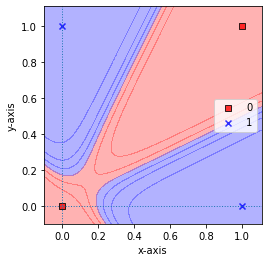

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
# import k-mooc in-house library
import joy

class NeuralNetwork():
    """ This class implements a multi-perceptron with backpropagation. 
         This handles a simple logics such as OR, AND, NAND, and 
         NOR gates, including XOR.
    """
    def __init__(self, net_arch, eta=0.1, epochs=100, random_seed=1):
        self.layers = len(net_arch)
        self.net_arch = net_arch
        self.eta = eta
        self.epochs = epochs
        self.random_seed = random_seed
        
    def fit(self, X, Y):
        """ 
        X: input dataset in row vector style, 
        Y: class labels
        w: optional weights, its shape is (3, 1)
        """
        # seed random numbers to make calculation deterministic 
        # initialize weights randomly with mean 0
        np.random.seed(self.random_seed)
        self.W1 = 2*np.random.random((self.net_arch[1], self.net_arch[0])) - 1
        self.W2 = 2*np.random.random((self.net_arch[2], self.net_arch[1])) - 1      
        #print('X.shape={}, Y.shape{}'.format(X.shape, Y.shape))
        #print('W1.shape={}, W2.shape={}'.format(self.W1.shape, self.W2.shape))

        self.cost_ = []
        
        for iter in range(self.epochs):
            A0 = X                             # to build a deep net later
            Z1 = np.dot(self.W1, A0)           # hidden layer input
            A1 = self.g(Z1)                    # hidden layer output
            Z2 = np.dot(self.W2, A1)           # output layer input
            A2 = self.g(Z2)                    # output layer results

            E2 = Y - A2                        # error @ output
            E1 = np.dot(self.W2.T, E2)         # error @ hidden

            # multiply the error by the slope at the values in Z?
            dZ2 = E2 * self.g_prime(Z2)        # backprop     
            dZ1 = E1 * self.g_prime(Z1)        # backprop   
           
            self.W2 += self.eta * np.dot(dZ2, A1.T) # update output layer W
            self.W1 += self.eta * np.dot(dZ1, A0.T) # update hidden layer W
            self.cost_.append(np.sqrt(np.sum(E2 * E2)))
        return self

    def net_input(self, X):                     ## sum-product  z
        if X.shape[0] == self.w.shape[0]:   # used with X0 = True data 
            return np.dot(X, self.w)
        else:
            return np.dot(X, self.w[1:]) + self.w[0]
    
    def g(self, x):    # activation function
        return 1/(1 + np.exp((-x)))
    
    def g_prime(self, x):  # gradient or sigmoid derivative
        return self.g(x) * (1 - self.g(x))

    def predict(self, X): 
        #print('predict: W1.shape:{}, Xshape:{} '.format(self.W1.shape, X.shape))
        Z1 = np.dot(self.W1, X.T)           # hidden layer input
        A1 = self.g(Z1)                     # hidden layer output
        Z2 = np.dot(self.W2, A1)            # output layer input
        A2 = self.g(Z2)                     # output layer results
        return A2

if __name__ == '__main__':
    
    nn = NeuralNetwork(net_arch=[2, 4, 1], eta = 0.5, epochs=10000)
    X = np.array([ [0, 0, 1, 1], [0, 1, 0, 1] ])   # input dataset - col vector     
    Y = np.array([0, 1, 1, 0])                     # class labels  - for rcolvector  
    
    nn.fit(X, Y)                       # train the net

    print("Final prediction of all")
    A2 = nn.predict(X.T)
    for x, yhat in zip(X.T, A2.T):
        print(x, np.round(yhat, 3))
        
    joy.plot_decision_regions(X.T, Y, nn)   
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.legend(loc='best')
    plt.show()

위의 예측값에 대한 그래프를 봅시다. 아주 잘 예측한 것을 확인할 수 있죠?

아래의 그래프는 각 `epoch` 마다 비용함수가 어떻게 변화하는지 보여줍니다. 비용 함수의 값이 점차적으로 줄어드는 것을 확인할 수 있죠? 우리가 예상한 대로 신경망이 학습을 하고 있다는 증거입니다.

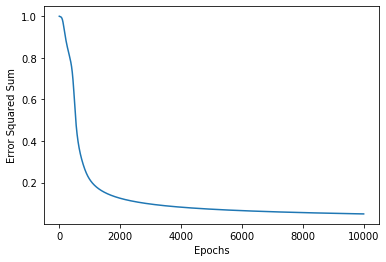

In [2]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.xlabel('Epochs')
plt.ylabel('Error Squared Sum')
plt.show()

## 참고 자료 
    
    
    

[1] Bengio, Yoshua. "Practical recommendations for gradient-based training of deep architectures." Neural Networks: Tricks of the Trade. Springer Berlin Heidelberg, 2012. 437-478.

[2] LeCun, Y., Bottou, L., Orr, G. B., and Muller, K. (1998a). Efficient backprop. In Neural Networks, Tricks of the Trade.

[3] Glorot, Xavier, and Yoshua Bengio. "Understanding the difficulty of training deep feedforward neural networks." International conference on artificial intelligence and statistics. 2010.

## 학습 정리
- XOR 신경망을 코드를 이해한다.
- XOR 신경망의 은닉층의 갯수에 따른 결과를 확인한다.
